<h1>Module Two: AI Foundations</h1>

<h2>Implementing a perceptron learning algorithm in Python</h2>


<h2>Section 2.3: An Extended Example</h2>

<h3>Today's Class</h3>

<h4>For Thursday, February 16:</h4>
<ul>
    <li>Individual Exercise - Perceptron</li>
    <li>Team exercise - Maybe</li>
</ul>



<h3>Expert Systems</h3>
<p>Rule based computer program that tried to capture and use human expertise on tasks.
    <p>They could work well - e.g. IBM's Deep Blue system that in 1996 defeated the world champion Gary Kasparov in chess.
        
<p> They had significant shortcomings:
<ul>
<li>They had to be created by hand. Every case, every scenario, every contingency had to be manually coded into them.</li>
    <li>This made them narrow in scope, and often brittle.</li>
    <li> They did not scale well.</li>
    </ul>

<h3>Machine Learning</h3>

<h2>A Perceptron Model Implemented in Python</h2>

<h3>The  Perceptron architecture:</h3>
<p>

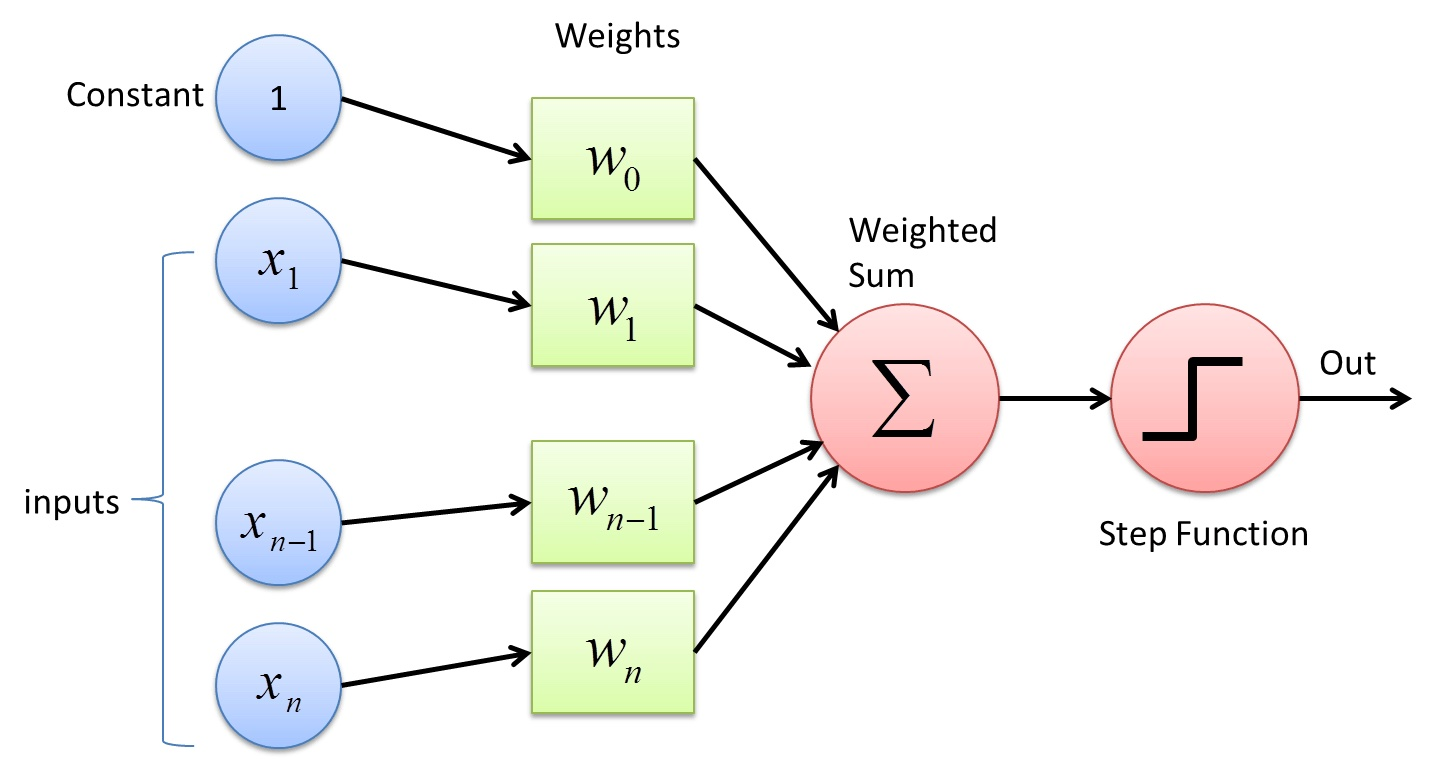

(Go over the Perceptron)
<p>Positive and negative weights
<p>The input as image pixels


<em>import</em> allows python to use code from other files, modules, or packages in your program.
<p>It is one of the reasons python is so popular - it is easy to use external packages to do man yspecialilzed tasks so you odn't have to create teh code for yourself.

In [ ]:
import numpy as np

Note that unless the code we execute has an output (or an error) we won't see anything when we run it.

<p>Here we define the program and data structures to create the perceptron.
<p>We will run it later on.

In [ ]:
#
# 
#
# Take an objected-oriented approach to define the perceptron interface as a Python Class
# It has a fit method a predict method
# Add an underscore to attributes that are not being created upon the initialization of the object but by calling the object's other methods
# In practice, samples need to be shuffled at each epoch, which will be implemented in the AdalineSGD
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of epochs (passes) over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        # initialize weights as an array of size 1 + number of features, all zeroes.
        # Initialize errors as empty list
        #self.w_ = np.zeros(1 + X.shape[1])
        self.w_ = np.full(1 + X.shape[1], 0.0)
        print(f'\tInitial weights {self.w_}')
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            # iterate samples one by one and update the weights
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                # Update the bias
                self.w_[0] += update
                #Update the weights
                self.w_[1:] += update * xi
                # If the erroris non-zero, update the number of errors by one 
                errors += int(update != 0.0)
                # print(f'Target: {target}\tPrediction: {self.predict(xi)}')
            # Update the number of errors in this epoch
            self.errors_.append(errors)
            
            print("The cumulative errors: ", self.errors_)
            print(f'\tCurrent weights: {self.w_}')
        return self
    
    def net_input(self, X):
        """Calculate net input before activation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

<h3>The Iris Dataset</h3>

The Iris Dataset is a dataset commonly used for machine learning. 
<p>It consists of measurements taken of various lengths of parts of the flower of three different species of iris.
<p>It is used in machine learning to predict which type of iris is present from the flower length measurements.
<p>There are 150 records - 50 for each iris species represented.
    

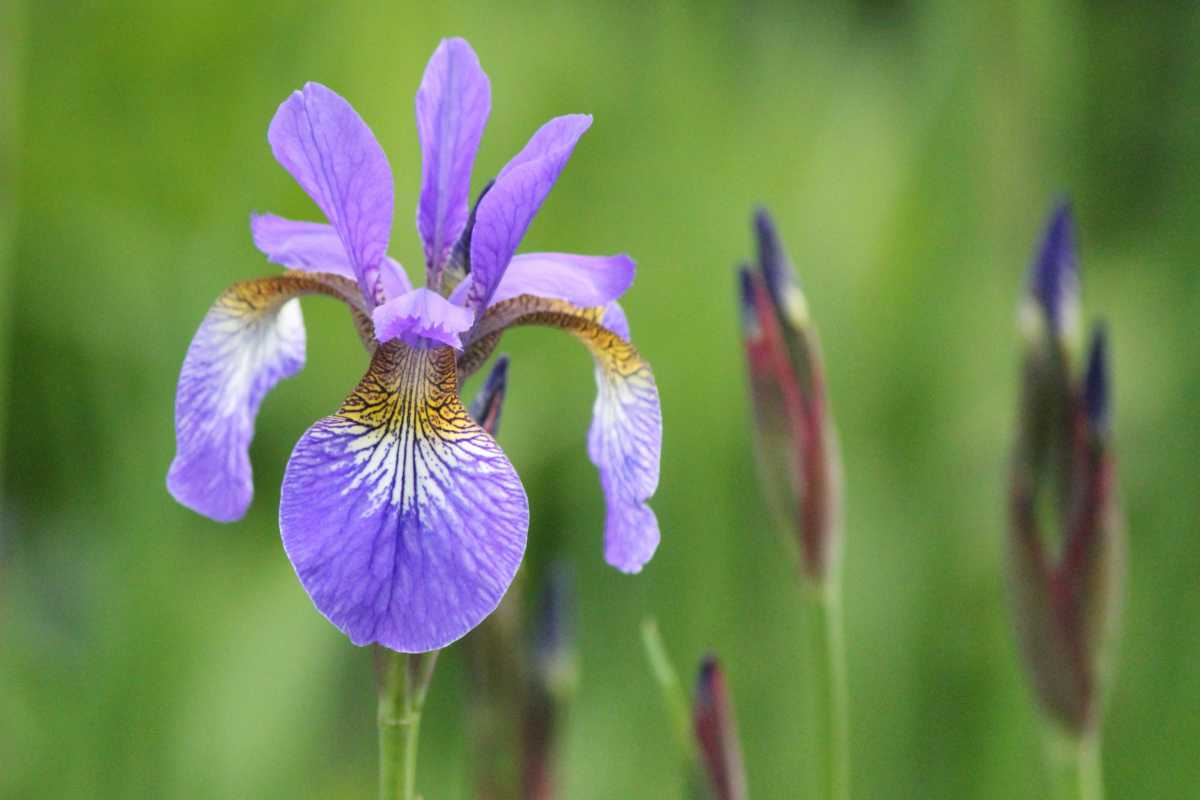

### Training a perceptron model on the Iris dataset

This code downloads the iris dataset from the internet so we can use it in our program.

In [ ]:
import pandas as pd
# read in iris data
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
# Show the dataset
df

Shw the beginning of the iris dataset

In [ ]:
df.head()

Show the end of the iris dataset

In [ ]:
df.tail()

Plot the data set using two of the lengths (0 and 2 above) to get an idea of how they cluster

In [ ]:
# plot the iris data using scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select two classes: setosa and versicolor
# Ignoring third kind (Iris Virginica) by ignoring those lines in the data
y = df.iloc[0:100, 4].values  # values method of a pandas dataframe yields Numpy array
y = np.where(y == 'Iris-setosa', -1, 1)

# select two features: sepal length and petal length for visualization
X = df.iloc[0:100, [0,2]].values

In [ ]:
# plot scatter plot
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o', label='sentosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Train the perceptron model

In [ ]:
# Create a perceptron classifer object and train the classifier with iris data
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# plot the error for each epoch to check for convergence
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Create a function for plotting decision regions

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

The code below works, but gives a warning message.
<p>This is one of the joys of working with packages. You frequently have to look up the package to see what is going on that gives you a warning, error, etc.
<p>Also, Jupyter notebooks aren't the greatest debugging environment.

In [ ]:
plot_decision_regions(X, y, ppn)


In [ ]:
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


In [ ]:
plt.show()

<p>I don't know if we'll (still) get to the next exercise today.

<h2>Team Exercise</h2>

<p>Elaborating on the exercise from last time:

<blockquote>I want your team to create a system to detect how many cars cross a local bridge. The system must recognize a car, and which direction it's going. If there is a car detected, the output of the ML system is combined with a date stamp (e.g. something to the effect of "A car was detected traveling west-bound at 1:34 PM on Wednesday, Feburuary 22, 2023.") and this is sent to a database of some kind.</blockquote>
   
<p>For this exercise, I would like your team to think abot hthe following question:
<p>Based on the people in yourteam today,
    <ul>
        <li>What skill sets does your team have to complete a machine learning project (cf. wahtthe author talks about in chapter eight)? What are those skills?</li>
        <li>What skill sets do you not have on your team?</li>
        </ul>

<p>Please submit on Brightspace:
        <ul>
    <li>The names of the team members present.</li>
    <li>Your answers to the above.</li>
    <ul>
    

<h3>Preparing for Upcoming Classes</h3>

<h4>For Tuesday, February 21:</h4>
<ul>
    <li>Exercises based upon our readings to date.</li>
</ul>

<h4>For Thursday, February 23:</h4>
<p>Starting Module Three: Data
<ul>
    <li>Read Chapter Two in the Text</li>
    <li>There will be a short quiz on Chapter Two.</li>
        <ul><li>(Individual and team)</li></ul>
    <li>And exercises.</li>
</ul>

<h4>For Tuesday, February 28:</h4>
<ul>
    <li>Exercises based upon our readings to date.</li>
</ul>

